# Book 2 - Exploratory Data Analysis



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import random
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
import datetime

matplotlib.style.use('ggplot') 
%matplotlib inline

# US Data Set - with Full Feature Set

In [3]:
# Full US data set
full = pd.read_csv('./data/events_b1a.csv')

In [4]:
print("Number of unique display_ID's (number of events): {0:,}".\
      format(full['display_id'].nunique()))

Number of unique display_ID's (number of events): 12,677,747


In [5]:
full.head(3)

,display_id,uuid,document_id,platform,geo_location,country,state,DMA,date_local,period,day_of_mnth,hour
0,1,cb8c55702adb93,379743,3,US>SC>519,US,SC,519,2016-06-14 00:00:00.059,overnight,14,0
1,2,79a85fa78311b9,1794259,2,US>CA>807,US,CA,807,2016-06-13 21:00:00.079,evening,13,21
2,3,822932ce3d8757,1179111,2,US>MI>505,US,MI,505,2016-06-14 00:00:00.180,overnight,14,0


In [6]:
df_heat = pd.pivot_table(full, index=['day_of_mnth'], columns =['hour'], values=['display_id'],\
               aggfunc = 'count')

In [7]:
df_heat.head()

display_id                                                        \
hour                0        1        2        3        4        5        6    
day_of_mnth                                                                    
13                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
14             24168.0  15966.0  12083.0  10564.0  13053.0  22807.0  41254.0   
15             22856.0  15330.0  11562.0   9753.0  11400.0  20019.0  37005.0   
16             23064.0  15396.0  11371.0   9611.0  11547.0  20151.0  36167.0   
17             26178.0  16948.0  12178.0  10329.0  12021.0  20467.0  37363.0   

                                         ...                                \
hour              7        8        9    ...          14       15       16   
day_of_mnth                              ...                                 
13               NaN      NaN      NaN   ...         NaN      NaN      NaN   
14           54525.0  60309.0  60212.0   ...     63109.0  63366.0  60847.0   
15           48303.0  54491.0  54843.0   ...     54898.0  56912.0  56221.0   
16           48129.0  54560.0  56271.0   ...     56803.0  61153.0  58378.0   
17           49216.0  54070.0  54752.0   ...     52005.0  52563.0  49775.0   

                                                                            
hour              17       18       19       20       21       22       23  
day_of_mnth                                                                 
13               NaN    190.0    222.0    430.0  12255.0  13407.0  19811.0  
14           50798.0  46661.0  47488.0  50993.0  55155.0  51640.0  38305.0  
15           45440.0  40503.0  41246.0  44969.0  51502.0  49081.0  35810.0  
16           48807.0  44013.0  44405.0  46998.0  52646.0  50104.0  38960.0  
17           42348.0  38580.0  37941.0  40403.0  45596.0  45758.0  37694.0  

[5 rows x 24 columns]

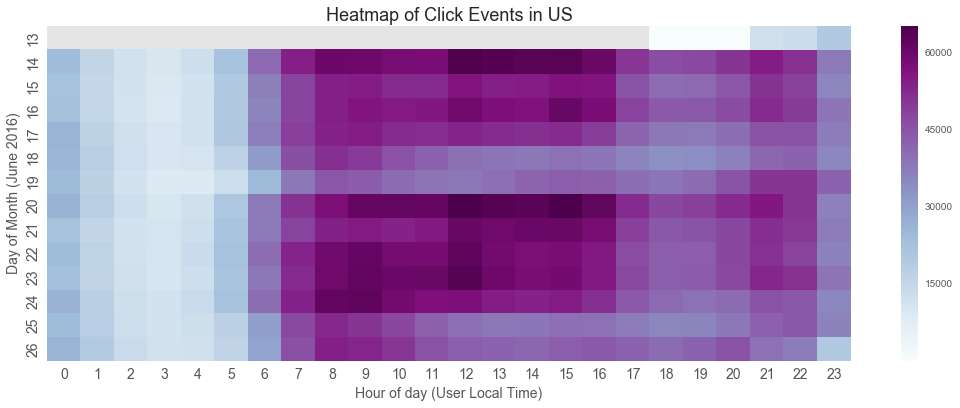

In [16]:
plt.figure(figsize=(18,6))
labels = np.arange(24)
sns.heatmap(df_heat, annot=False, cmap='BuPu',xticklabels = labels)

plt.xlabel('Hour of day (User Local Time)', fontsize=14)
plt.ylabel('Day of Month (June 2016)', fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.title('Heatmap of Click Events in US', fontsize = 18);

In [9]:
e_count = full['platform'].value_counts()

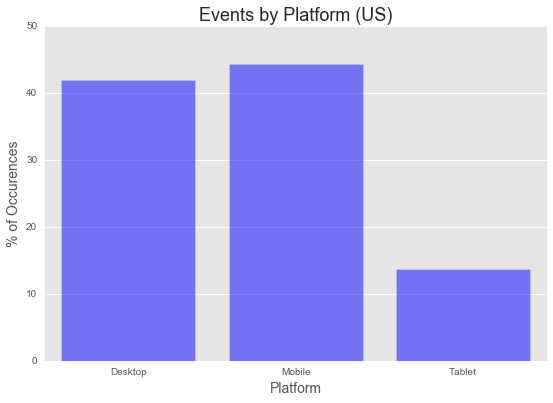

In [19]:
measure = e_count.values

fig, ax1 = plt.subplots(figsize=(9,6))
labels = ['Mobile', 'Desktop', 'Tablet']
ax1.bar(e_count.index, 100*measure/float(sum(measure)), color='blue',
        alpha=0.5,tick_label=labels,align='center')
ax1.set_title('Events by Platform (US)', fontsize=18)
ax1.set_xlabel('Platform', fontsize=14)
ax1.set_ylabel('% of Occurences', fontsize=14)
plt.grid(which = 'major',axis = 'x')

plt.ylim([0,50]) ;

In [11]:
user_count = full.groupby('uuid')['uuid'].count().sort_values()


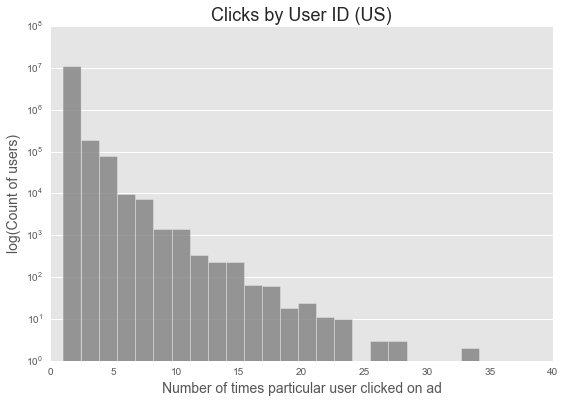

In [20]:
plt.figure(figsize=(9,6))
plt.hist(user_count.values, alpha = 0.8, color = 'grey',bins = 25)
plt.xlabel('Number of times particular user clicked on ad', fontsize=14)
plt.ylabel('log(Count of users)', fontsize=14)
plt.yscale('log')
plt.title('Clicks by User ID (US)', fontsize = 18)
plt.grid(which = 'major',axis = 'x')

plt.show();


In [72]:
print('Percentage of users who only clicked on one ad/recommendation: {0:.1%}'.\
      format(round((user_count < 2).mean(), 2)))


Percentage of users who only clicked on one ad/recommendation: 89.0%


## A look at the sample set of data

In [79]:
# Sample US data set
with open('./data/data_bk1_complete.pkl', 'r') as picklefile:
    sample = pickle.load(picklefile)

In [80]:
print("Number of unique display_ID's (number of events): {0:,}".\
      format(sample['display_id'].nunique()))
print('Number of clicks (# of events): {0:,}'.\
      format(np.sum(sample['clicked'])))
print('Number of records: {0:,}'.\
      format(len(sample)))

Number of unique display_ID's (number of events): 13,574
Number of clicks (# of events): 13,574
Number of records: 69,838


In [84]:
print('Average ads per page: {0:.2f}'.format(69838./13574))
print('Baseline for picking correct ad: {0:.4f}'.format(13574./69838))

Average ads per page: 5.14
Baseline for picking correct ad: 0.1944


In [85]:
sample.head(3)

,display_id,ad_id,clicked,uuid,document_id,platform,geo_location,country,state,DMA,date_local,period,day_of_mnth,hour,ads_per_page,ad_document_id,campaign_id,advertiser_id,doc_id_topic,ad_id_topic
0,1525,8846,0,443715a4da754f,1697627,1,US>IL>602,US,IL,602,2016-06-13 23:01:46.019,overnight,13,23,9,21135,1726,24,271.0,125.0
1,1525,45180,0,443715a4da754f,1697627,1,US>IL>602,US,IL,602,2016-06-13 23:01:46.019,overnight,13,23,9,953930,6296,1594,271.0,286.0
2,1525,46293,0,443715a4da754f,1697627,1,US>IL>602,US,IL,602,2016-06-13 23:01:46.019,overnight,13,23,9,959753,959,8,271.0,147.0


In [95]:
sample_clicks = sample[sample['clicked'] == 1]
len(sample_clicks)

13574

In [92]:
s_heat = pd.pivot_table(sample_clicks, index=['day_of_mnth'], columns =['hour'], values=['display_id'],\
               aggfunc = 'count')

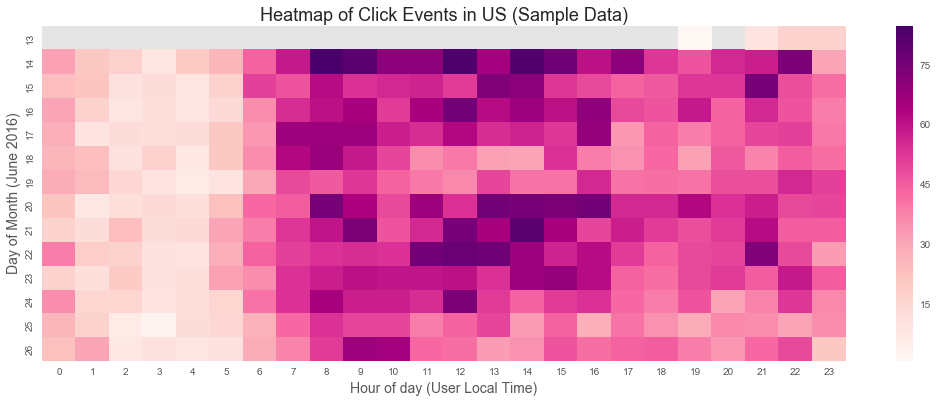

In [96]:
plt.figure(figsize=(18,6))
labels = np.arange(24)
sns.heatmap(s_heat, annot=False, cmap='RdPu',xticklabels = labels)

plt.xlabel('Hour of day (User Local Time)', fontsize=14)
plt.ylabel('Day of Month (June 2016)', fontsize=14)


plt.title('Heatmap of Click Events in US (Sample Data)', fontsize = 18);

In [97]:
s_count = sample['platform'].value_counts()

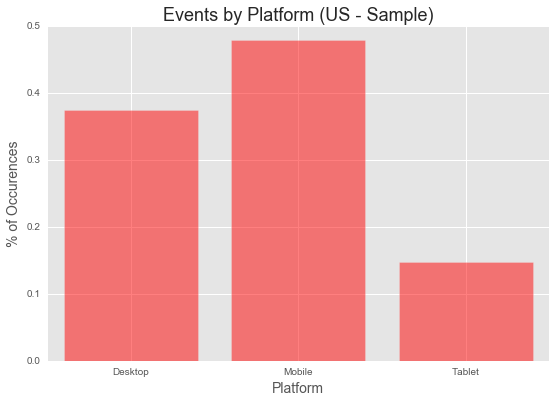

In [98]:
measure = s_count.values

fig, ax1 = plt.subplots(figsize=(9,6))
labels = ['Mobile', 'Desktop', 'Tablet']
ax1.bar(e_count.index, measure/float(sum(measure)), color='red',
        alpha=0.5,tick_label=labels,align='center')
ax1.set_title('Events by Platform (US - Sample)', fontsize=18)
ax1.set_xlabel('Platform', fontsize=14)
ax1.set_ylabel('% of Occurences', fontsize=14);

In [99]:
user_count_s = sample.groupby('uuid')['uuid'].count().sort_values()


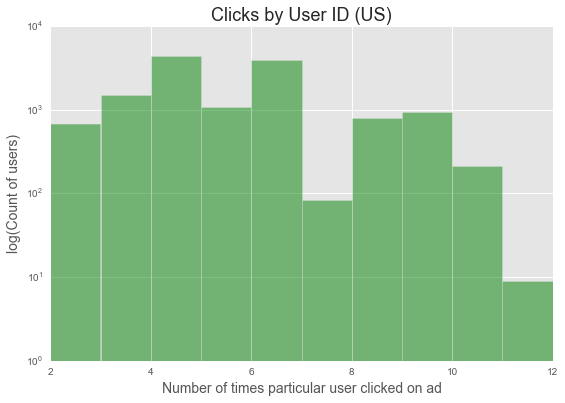

In [101]:
plt.figure(figsize=(9,6))
plt.hist(user_count_s.values, alpha = 0.5, color = 'green',bins = 10)
plt.xlabel('Number of times particular user clicked on ad', fontsize=14)
plt.ylabel('log(Count of users)', fontsize=14)
plt.yscale('log')
plt.title('Clicks by User ID (US)', fontsize = 18)
plt.show();

In [109]:
ad_count = [(sample.groupby('display_id')['ad_id'].count().value_counts())]

In [110]:
ad_count = pd.DataFrame(ad_count).T.fillna(1)

In [117]:
ad_count = ad_count.sort_index()
ad_count.head(2)

,ad_id
2,0.049580
3,0.109253


In [112]:
total = ad_count['ad_id'].sum()
print('Total ad count: {0:,}'.format(total))


Total ad count: 13,574


In [113]:
ad_count['ad_id'] = ad_count['ad_id']/total


In [114]:
# weighted ad count (global)
ad_count['ad_id'].sum()

1.0

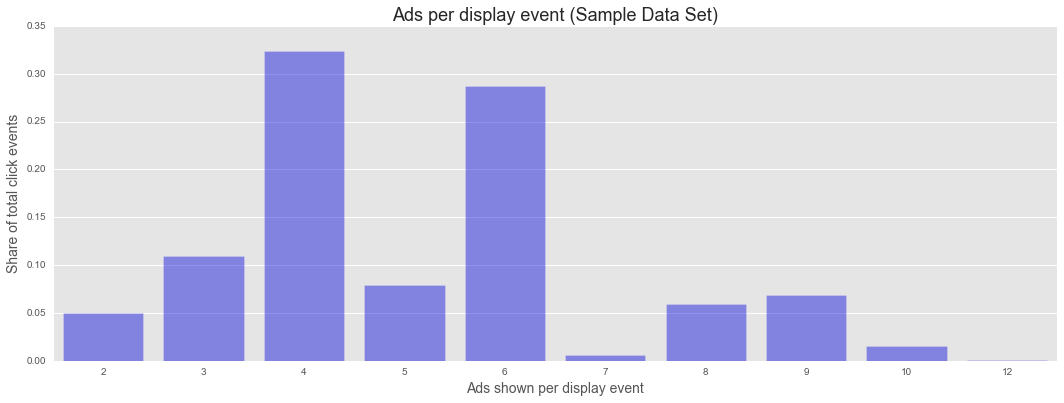

In [116]:
plt.figure(figsize=(18,6))
sns.barplot(ad_count.index, ad_count['ad_id'], color='blue', alpha=0.5)
plt.title('Ads per display event (Sample Data Set)',fontsize = 18)
plt.xlabel('Ads shown per display event', fontsize=14)
plt.ylabel('Share of total click events', fontsize=14);

The ad count per event is weighted heavily towards 4 and 6 ad displays per page (just over 60%), with almost another quarter from 2, 3, and 5 per event.

In [118]:
ad_occ = sample.groupby('ad_id')['ad_id'].count()

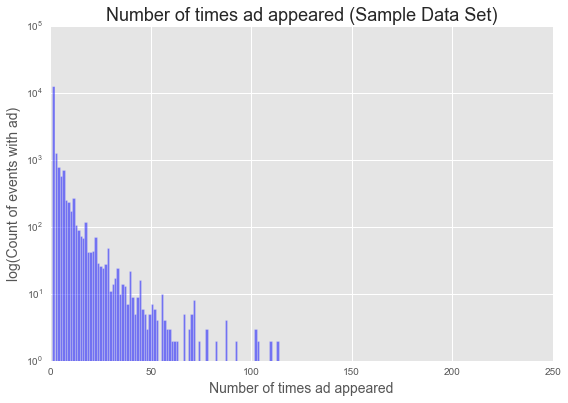

In [122]:
plt.figure(figsize=(9,6))
plt.hist(ad_occ.values, alpha = 0.5, color = 'blue',bins = 200)
plt.title('Number of times ad appeared (Sample Data Set)',fontsize = 18)
plt.xlabel('Number of times ad appeared', fontsize=14)
plt.ylabel('log(Count of events with ad)', fontsize=14)
plt.yscale('log')
#plt.ylim([0,2])
plt.show();

The chart shows that a large percentage of the adds appear very few times, **with over 50% appearing less than 5 times.** 

From this it appears that we will not be able to use the ad iteself as a predictor, but will need to build some other linkages. Possibly the docuemnt subject matter (based on confidence level), advertiser or campaign, etc.


## Promoted data
The document_id associated with each ad_id in the promoted content is the document to which the ad refers (i.e. you would use this table in order to find the topics, categories, or entities referred to in an ad). One or more ads may point to the same document.

In [123]:
promoted = pd.read_csv('./data/promoted_content.csv')
promoted.head()

,ad_id,document_id,campaign_id,advertiser_id
0,1,6614,1,7
1,2,471467,2,7
2,3,7692,3,7
3,4,471471,2,7
4,5,471472,2,7


In [124]:
promoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559583 entries, 0 to 559582
Data columns (total 4 columns):
ad_id            559583 non-null int64
document_id      559583 non-null int64
campaign_id      559583 non-null int64
advertiser_id    559583 non-null int64
dtypes: int64(4)
memory usage: 17.1 MB


In [125]:
pd.pivot_table(promoted, index=['advertiser_id','campaign_id'], values=['ad_id'],\
               aggfunc = 'count').head()

ad_id
advertiser_id campaign_id       
2             21016            2
3             26266           12
4             3837             3
              3838            15
              4018            17

In [126]:
pd.pivot_table(promoted, index=['advertiser_id'], values=['ad_id'],aggfunc = 'count').\
                 sort_values(by='ad_id', ascending = False).head()

,ad_id
advertiser_id,
266,16529
1635,15450
3829,14844
1634,10552
3922,10046


## Document Data

* meta data
    * source_id (the part of the site on which the document is displayed, e.g. edition.cnn.com)
    * publisher_id (e.g. cnn.com)
    * publish_time
* document description - provide information about the content in a document, as well as Outbrain's confidence in each respective relationship. Their can be more than one per docuemnt/ad.
    * topic data
    * entity data
    * category data

In [127]:
d_meta = pd.read_csv('./data/documents_meta.csv')
d_meta.head()

,document_id,source_id,publisher_id,publish_time
0,1595802,1.0,603.0,2016-06-05 00:00:00
1,1524246,1.0,603.0,2016-05-26 11:00:00
2,1617787,1.0,603.0,2016-05-27 00:00:00
3,1615583,1.0,603.0,2016-06-07 00:00:00
4,1615460,1.0,603.0,2016-06-20 00:00:00


In [128]:
d_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999334 entries, 0 to 2999333
Data columns (total 4 columns):
document_id     int64
source_id       float64
publisher_id    float64
publish_time    object
dtypes: float64(2), int64(1), object(1)
memory usage: 91.5+ MB


In [129]:
np.sort(d_meta.publish_time.unique())

array([nan, '0002-11-27 19:00:00', '0002-11-29 19:00:00', ...,
       '3011-03-30 00:00:00', '3012-05-03 00:00:00', '9953-03-01 00:00:00'], dtype=object)

In [130]:
d_meta.publish_time.isnull().sum()

1011118

<font color='red'>**About 25% of publish times are nan, and some are future time (ahead of time range sampled)**</font> 
Not sure how to use this data

In [131]:
d_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999334 entries, 0 to 2999333
Data columns (total 4 columns):
document_id     int64
source_id       float64
publisher_id    float64
publish_time    object
dtypes: float64(2), int64(1), object(1)
memory usage: 91.5+ MB


In [132]:
print('Unique Publishers (cnn.com): {0:,}'.format(len(d_meta.source_id.unique())))
print('Unique Sources (edition.cnn.com): {0:,}'.format(len(d_meta.publisher_id.unique())))

Unique Publishers (cnn.com): 14,395
Unique Sources (edition.cnn.com): 1,260


place holder

In [133]:
d_top = pd.read_csv('./data/documents_topics.csv')
d_ent = pd.read_csv('./data/documents_entities.csv')
d_cat = pd.read_csv('./data/documents_categories.csv')

In [134]:
print(d_top.topic_id.unique())
print(d_ent.entity_id.unique())
print(d_cat.category_id.unique())

# no missing descriptive ID's as seen below (no nan's or empty positions.)

[140  16 143 170 113 260  92 168  54 207 258  10 148  89 198  26  84 262
 108 202  72 242 221 192 279   2 274  32 100  65  86 249  66 193 285 298
  67 107 196 281  74  64  20  55 109  50  62 142  75 297 296 110  68 160
 181 153  85 176 155  52 171  69 131 136 165 219  24 228 141   8 128 149
 105  71 173  90 162  46 213  81  43 276  19  29 177 204  95 144 290 287
  25 121 254  42   1  94 265 271 102 223 130 295  35 175 231 179 268 145
 184 163 244  61 112  56 154 138 190  57 232 239 235 250 104   5 291 180
 174  23  17   9 226 132 247 167 266 201 277 156 252 292 123  13 200 208
 272 191  78 259 286  97 125  80 218  37  73  22 243 246 294 283 289  31
 217 248  27 183 150  60  48 257 159 241   0 288 264  93  15 199 256  44
 103  21 238 194 269 282 135 206 119 230 118 209 270  82 172 147 134 237
  36  79 225  76 275  38  14 106  58  30 129 229 124  41  49  39 233  11
 117 211 227  87 216   4   3   7 188  53 186 120 224 299  33  91 157 251
 137 220  77 158  47 139 111  63 178 146 280 253 23

In [135]:
print('Unique Topics: {0:,}'.format(len(d_top.topic_id.unique())))
d_top.head()

Unique Topics: 300


,document_id,topic_id,confidence_level
0,1595802,140,0.073113
1,1595802,16,0.059416
2,1595802,143,0.045421
3,1595802,170,0.038867
4,1524246,113,0.196450


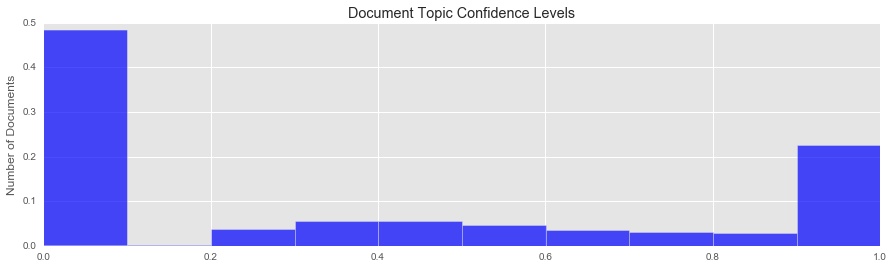

In [136]:
measure = d_cat.confidence_level

# to normalize a histogram
wght = np.ones_like(measure)/float(len(measure))

fig, ax1 = plt.subplots(figsize=(15,4))
ax1.hist(measure, weights = wght, alpha=0.7, color = 'blue')
ax1.set_title('Document Topic Confidence Levels')
ax1.set_ylabel('Number of Documents', fontsize=12);
# d_top.confidence_level[d_top.confidence_level > 0.2]


In [137]:
print('Unique Topics: {0:,}'.format(len(d_ent.entity_id.unique())))
d_ent.head()

Unique Topics: 1,326,009


,document_id,entity_id,confidence_level
0,1524246,f9eec25663db4cd83183f5c805186f16,0.672865
1,1524246,55ebcfbdaff1d6f60b3907151f38527a,0.399114
2,1524246,839907a972930b17b125eb0247898412,0.392096
3,1524246,04d8f9a1ad48f126d5806a9236872604,0.213996
4,1617787,612a1d17685a498aff4f036c1ee02c16,0.386193


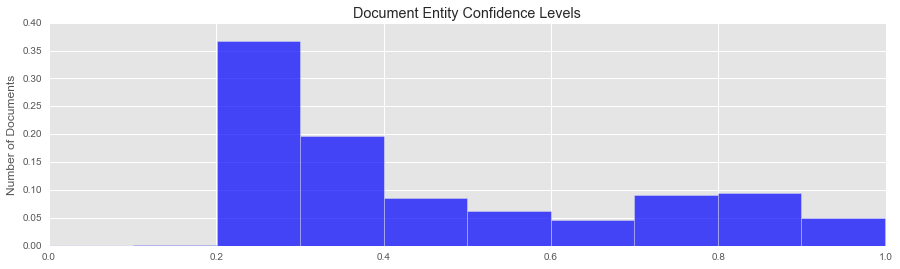

In [138]:
measure = d_ent.confidence_level

# to normalize a histogram
wght = np.ones_like(measure)/float(len(measure))

fig, ax1 = plt.subplots(figsize=(15,4))
ax1.hist(measure, weights = wght, alpha=0.7, color = 'blue')
ax1.set_title('Document Entity Confidence Levels')
ax1.set_ylabel('Number of Documents', fontsize=12);


In [139]:
print('Unique Categories: {0:,}'.format(len(d_cat.category_id.unique())))
d_cat.head()

Unique Categories: 97


,document_id,category_id,confidence_level
0,1595802,1611,0.92
1,1595802,1610,0.07
2,1524246,1807,0.92
3,1524246,1608,0.07
4,1617787,1807,0.92


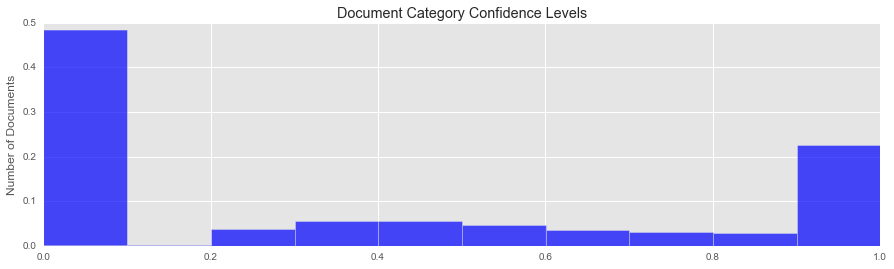

In [140]:
measure = d_cat.confidence_level

# to normalize a histogram
wght = np.ones_like(measure)/float(len(measure))

fig, ax1 = plt.subplots(figsize=(15,4))
ax1.hist(measure, weights = wght, alpha=0.7, color = 'blue')
ax1.set_title('Document Category Confidence Levels')
ax1.set_ylabel('Number of Documents', fontsize=12);

